In [3]:
from random import gauss
from random import seed
from pandas import Series
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
import sklearn

In [8]:
l = 50000
eSeriesX = np.zeros((5,l))

for i in range(5):
    seed(i)
    series = [gauss(0.0, 1.0) for i in range(l)]
    eSeriesX[i,:] = Series(series)


In [27]:
X = np.zeros((5,l))
for i in range(l):
    X[0,i] = .95*np.sqrt(2)*X[0,i-1] - .9025*X[0,i-2] + eSeriesX[0,i]
    X[1,i] = .5*X[0,i-2] + eSeriesX[1,i]
    X[2,i] = -.4*X[0,i-3] + eSeriesX[2,i]
    X[3,i] = -.5*X[0,i-2] + .25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[3,i]
    X[4,i] = -.25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[4,i]
X = np.transpose(X)

    

In [87]:
memVec =  [4]#[1, 2, 4, 8, 12, 16, 20]
ridgeVec = [0] 
error = np.zeros((len(memVec),2,len(ridgeVec)))
c = np.ones((l,1))

for L in ridgeVec:
    count = 0
    for px in memVec: #number of memory points to look to minus 1
        memMat = c
        hold = X
        error[memVec.index(px),0,ridgeVec.index(L)] = px
        for i in range(px):
            hold = np.roll(hold,1,axis=0)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))

        runSum = 0
        cvLam = sklearn.model_selection.KFold(n_splits=10)
        for train, test in cvLam.split(memMat):
            ols = Ridge(alpha=L)
            ols.fit(memMat[train],X[train])
            pred = ols.predict(memMat[test])
            runSum = runSum + np.linalg.norm((X[test]-pred)) #I don't know if this is the best way to do the collective error
        error[memVec.index(px),1,ridgeVec.index(L)] = runSum

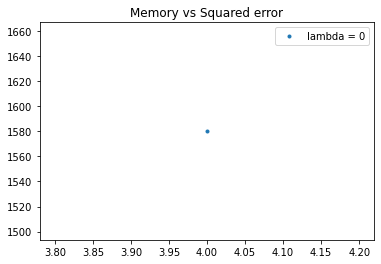

In [88]:
plt.title("Memory vs Squared error") #### can update the code below with this type of loop
for i in range(len(ridgeVec)):
    plt.plot(error[:, 0, i], error[:,1, i], ".", label = f"lambda = {ridgeVec[i]}")
plt.legend()
plt.show()

In [89]:
print(ols.coef_)

[[ 0.00000000e+00  1.34422508e+00 -1.90658144e-03 -1.88203948e-04
   5.09303652e-03  4.65552469e-03 -9.00989298e-01 -2.42296286e-03
  -5.72927966e-03 -2.85924864e-03  3.62294917e-03  3.04062043e-03
  -5.63982476e-03 -3.69219156e-03 -1.01060406e-02 -4.26466415e-03
  -3.81562251e-03 -1.07042559e-03 -1.17509225e-03  6.31262911e-03
   8.66436620e-03]
 [ 0.00000000e+00 -4.07107870e-03  1.55978598e-03 -4.02942270e-03
  -1.06832496e-02  2.45259332e-03  5.04831973e-01  3.76765440e-03
  -3.75833631e-03  7.41232122e-03  3.94190189e-03 -8.79517192e-03
  -1.44821928e-03  1.90181059e-03  6.60371957e-03 -7.94451726e-03
   4.84222666e-04  1.60515899e-03  7.97293949e-04 -9.31954013e-03
   2.23496225e-03]
 [ 0.00000000e+00 -2.66336036e-03  1.89318851e-03  3.33071412e-03
  -3.34567414e-03  1.80145056e-02 -2.65722327e-03  1.86270789e-04
  -4.08746995e-05  8.92240657e-03  1.89249613e-04 -3.98525460e-01
  -5.53766209e-03 -4.00645712e-03 -2.11682279e-03  2.43524345e-04
  -2.58897494e-03  3.99662144e-03  4.1